<a href="https://colab.research.google.com/github/escape1001/ormcamp/blob/main/python/240116_lms_%ED%81%AC%EB%A1%A4%EB%A7%81%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 크롤링 연습문제
https://paullab.co.kr/stock.html
- 각 회사 별 1만주씩 있다고 가정했을 때 전 그룹사 시가총액 구하기
- 전 그룹사 시가총액 추이를 그래프로 생성 (x축 날짜, y축 가격)

In [1]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://paullab.co.kr/stock.html')
soup = BeautifulSoup(response.text, 'html.parser')

In [45]:
tables = soup.select('.main')[2:]
전그룹_시가현황_리스트 = []

for item in tables :
    이름 = item.select("h2")[0].text
    날짜리스트 = [i.text for i in item.select("tr .date")]
    시가리스트 = [int(i.text.replace(",", "")) for i in item.select("tr td:nth-child(4)")]

    zip_list = zip(날짜리스트, 시가리스트)
    res = [{"날짜":i[0], "시가": i[1]} for i in zip_list]

    전그룹_시가현황_리스트.append({
        "이름" : 이름,
        "시가현황" : res
    })

In [46]:
print(f"전 그룹 1만주일 때 시가총액은")
for i in 전그룹_시가현황_리스트:
    print(f"{i['이름']} : {i['시가현황'][0]['시가'] * 10000}")

전 그룹 1만주일 때 시가총액은
제주코딩베이스캠프 연구원 : 65900000
제주코딩베이스캠프 미디어 : 311500000
제주코딩베이스캠프 출판사 : 134000000
주식회사 위니브 : 20550000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

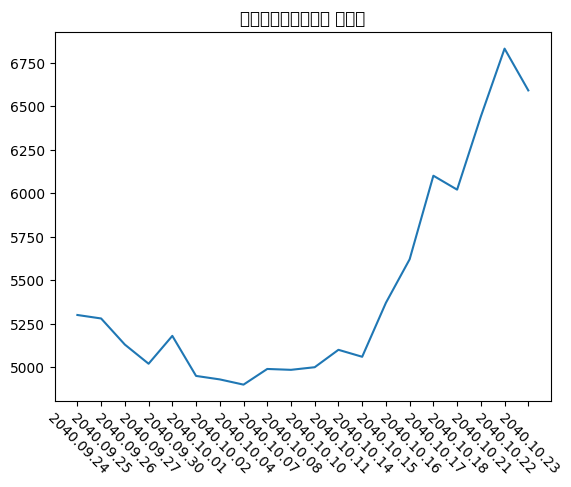

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


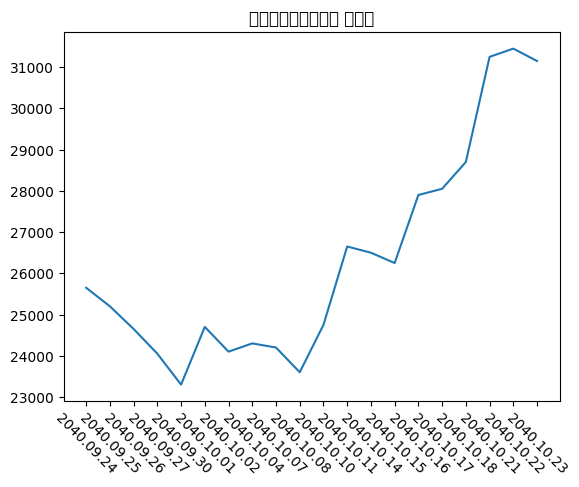

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


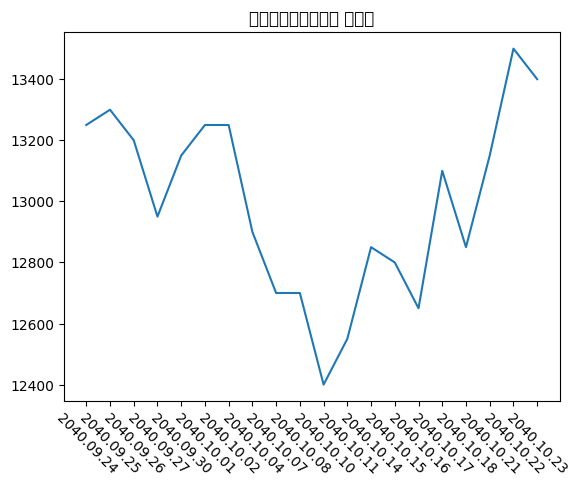

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


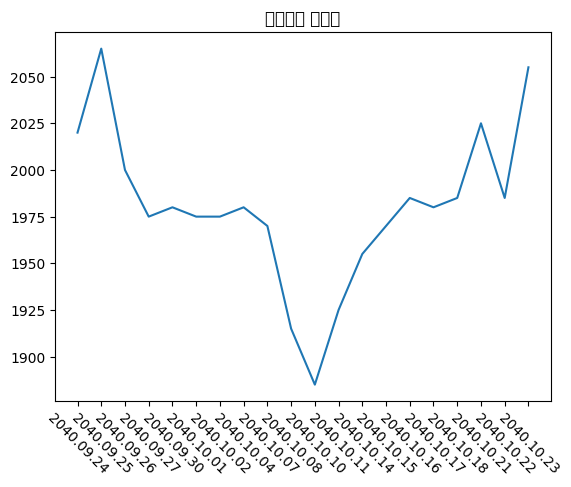

In [62]:
import matplotlib.pyplot as plt

for table in 전그룹_시가현황_리스트:
    dates = [i["날짜"] for i in table["시가현황"]]
    prices = [i["시가"] for i in table["시가현황"]]

    plt.plot(dates[::-1], prices[::-1])
    plt.title(table["이름"])
    plt.xticks(rotation = -45)
    plt.show()

# 음원 차트에서 내 아티스트 노래 몇위인지 확인하기

In [65]:
# 멜론 Top 100
h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"}

response = requests.get('https://www.melon.com/chart/index.htm', headers=h)
soup = BeautifulSoup(response.text, 'html.parser')

In [85]:
tr_list = soup.select("#tb_list tr")[1::]
target_artist_name = "aespa"

print("[멜론 Top 100]")
for item in tr_list :
    if target_artist_name in item.select(".wrap_song_info")[0].text :
        곡명 = item.select('.wrap_song_info')[0].text.replace("\n", "").replace(target_artist_name, "")
        순위 = item.select('.rank')[0].text
        print(f"{곡명} - {순위}위")
else :
    print("-----------------------")

[멜론 Top 100]
Drama - 4위
Spicy - 50위
-----------------------


In [89]:
# 지니 Top 200
# https://www.genie.co.kr/chart/top200?ditc=D&ymd=20240116&hh=12&rtm=Y&pg=1 # pg4까지
# https://www.genie.co.kr/chart/top200?pg=1

soup_list = []

for i in range(1,5):
    response = requests.get(f'https://www.genie.co.kr/chart/top200?pg={i}', headers=h)
    soup_list.append(BeautifulSoup(response.text, 'html.parser'))

In [147]:
table_list = sum([soup.select(".music-list-wrap") for soup in soup_list], [])
rank_list = sum([table.select("tbody tr") for table in table_list], [])

print("[지니 Top 200]")
for item in rank_list :
    if target_artist_name in item.select(".artist")[0].text :
        곡명 = item.select('.info .title')[0].text.replace("\n", "").strip()
        순위태그 = str(item.select('.number')[0])
        순위시작 = 순위태그.index(">") + 1
        순위끝 = 순위태그.index("<span")
        순위 = 순위태그[순위시작:순위끝].strip()

        print(f"{곡명} - {순위}위")
else :
    print("-----------------------")

[지니 Top 200]
Drama - 5위
Spicy - 49위
Next Level - 148위
시대유감 (時代遺憾) (2024 aespa Remake Ver.) - 160위
-----------------------
